In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load your dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Convert 'TotalCharges' to numeric and handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
data

<ipython-input-4-251eb6eb1dae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
# Encode binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [6]:
# One-hot encoding for columns with more than two categories
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,False,False,False,True,False,True,False,True,False,True
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,False,True,False,True,False,False,False,True,False,True
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,False,False,False,False,False,False,False,False,False,False
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Define features (X) and target (y)
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
# Scale numerical features (StandardScaler for continuous features)
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 87)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=87)

In [11]:
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Calculate and print accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy : {}%".format(round(acc * 100, 2)))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1035
           1       0.60      0.58      0.59       374

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[891 144]
 [158 216]]
ROC-AUC Score: 0.8340850964891886

Accuracy : 78.57%


In [13]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean
feature_names = X_train.columns

# Print feature importances
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance}")

Feature: gender, Importance: -0.0024130589070262888
Feature: SeniorCitizen, Importance: 0.0019162526614619813
Feature: Partner, Importance: -0.0009936124911284817
Feature: Dependents, Importance: -0.00014194464158981957
Feature: tenure, Importance: 0.022143364088005657
Feature: PhoneService, Importance: 7.097232079485982e-05
Feature: PaperlessBilling, Importance: -0.003193754435770091
Feature: MonthlyCharges, Importance: 0.003974449964513793
Feature: TotalCharges, Importance: 0.013271823988644382
Feature: InternetService_Fiber optic, Importance: 0.001064584811923308
Feature: InternetService_No, Importance: 0.0
Feature: Contract_One year, Importance: 0.001703335699077324
Feature: Contract_Two year, Importance: 0.0006387508871539826
Feature: PaymentMethod_Credit card (automatic), Importance: -0.0022001419446416094
Feature: PaymentMethod_Electronic check, Importance: 0.001632363378282442
Feature: PaymentMethod_Mailed check, Importance: 0.000851667849538651
Feature: MultipleLines_No phone 

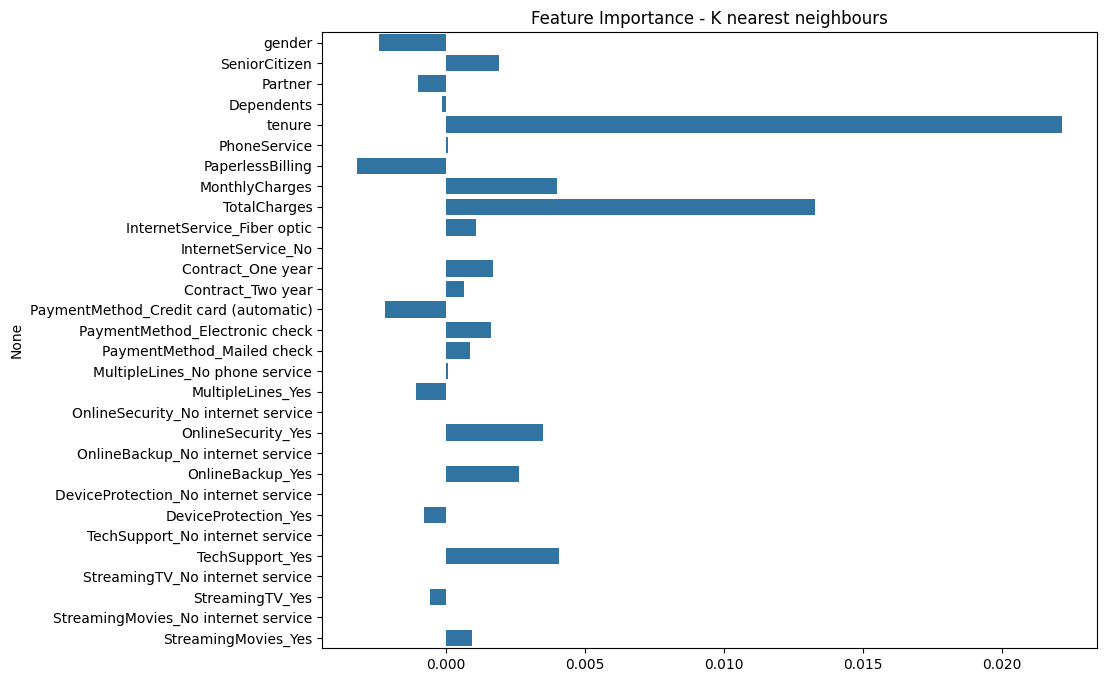

In [14]:
# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title('Feature Importance - K nearest neighbours')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform

# Define a smaller parameter distribution for KNN
param_dist = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': randint(20, 100)
}

random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    n_jobs=2,
    cv=3,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best AUC score found: ", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'leaf_size': 81, 'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}
Best AUC score found:  0.8279016055641474
